<a href="https://colab.research.google.com/github/Aarthy140302/Bank-Management-System/blob/main/Epilepsy_Seizure_Detection_using_ML_Algms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
# Importing the neccessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


Read the Data

In [ ]:
df = pd.read_csv('datas.csv')
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


Describe the Dataset

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [ ]:
df.dtypes

X0      object
X1       int64
X2       int64
X3       int64
X4       int64
         ...  
X175     int64
X176     int64
X177     int64
X178     int64
y        int64
Length: 180, dtype: object

In [ ]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Shape of Dataset

In [ ]:
df.shape

(11500, 180)

In [ ]:
df.isnull().sum()

X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 180, dtype: int64

Input Data

In [ ]:
X=df.drop(['y','X0'],axis=1)
print(X)

        X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
0      135  190  229  223  192  125   55   -9  -33  -38  ...     8   -17   
1      386  382  356  331  320  315  307  272  244  232  ...   168   164   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    29    57   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -82   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...    10     4   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    20    15   
11496  -47  -11   28   77  141  211  246  240  193  136  ...   -94   -65   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   -42   -65   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   114   121   
11499   29   41   57   72   74   62   54   43   31   23  ...   -94   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  
0       -15   -31   -77  -103  

Output Data

In [ ]:
Y=df['y']
print(Y)

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64


Checking the distribution of data

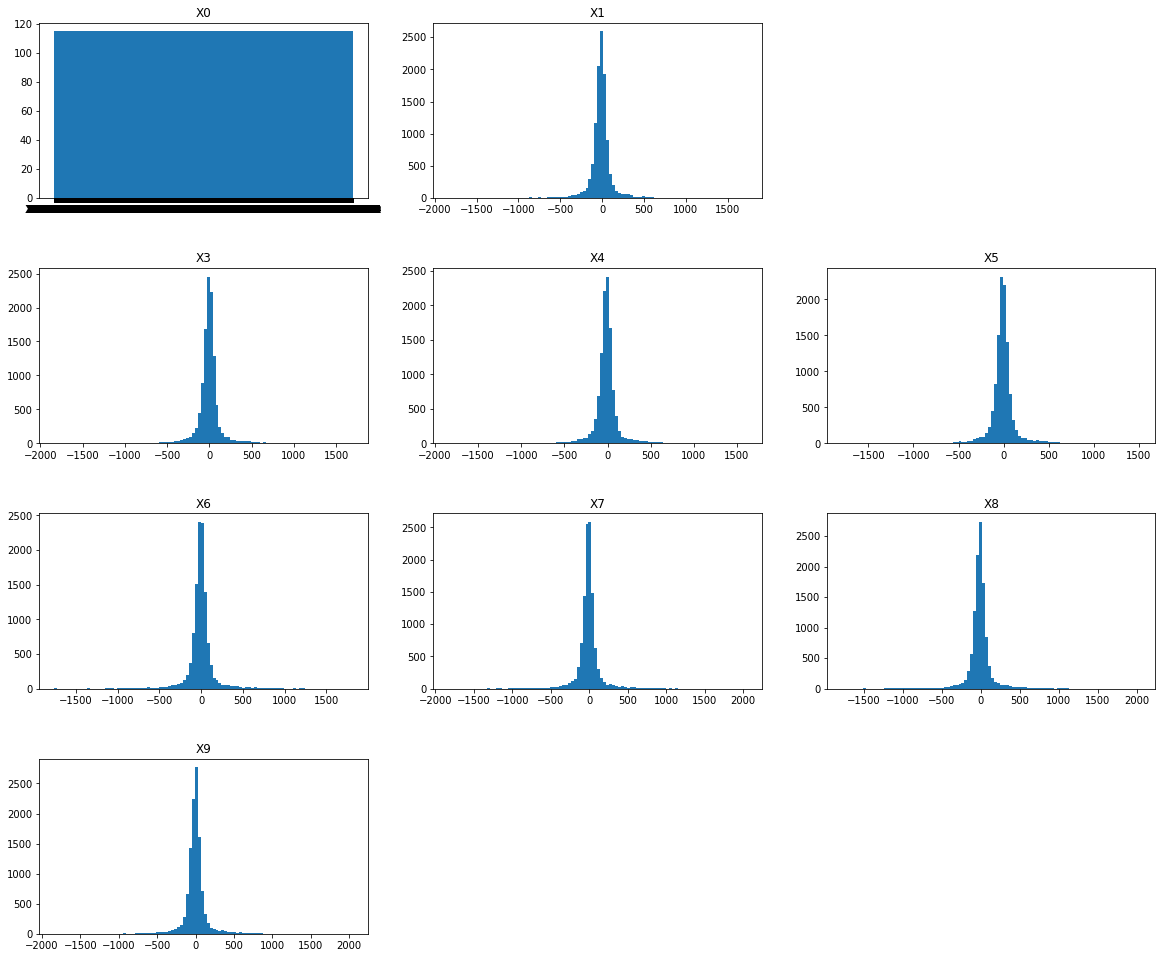

In [ ]:
limit = 10 # Because we have many columns we only draw bar graphs for few of them only

fig = plt.figure(figsize=(20,540))
for i,col in enumerate(df.columns[:limit]):
    if i != 2:  
        ax = fig.add_subplot(120, 3, i+1)
        ax.hist(df.iloc[:,i].dropna(),bins = 100)
        ax.set_title(col)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()
    

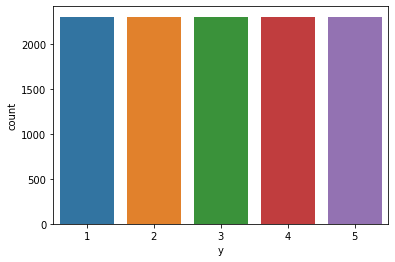

In [ ]:
sns.countplot(df['y'])

Number of patients with Absence Seizure

In [ ]:
count = 0
for ele in Y:
   if (ele == 1):
      count = count + 1
    

print(count)

2300


Number of patients with Myoclonic Seizure

In [ ]:
count = 0
for ele in Y:
   if (ele == 2):
      count = count + 1
    

print(count)

2300


Number of patients with Tonic Seizure

In [ ]:
count = 0
for ele in Y:
   if (ele == 3):
      count = count + 1
    

print(count)

2300


Number of patients with Clonic Seizure

In [ ]:
count = 0
for ele in Y:
   if (ele == 4):
      count = count + 1
    

print(count)

2300


Number of patients with Atonic Seizure

In [ ]:
count = 0
for ele in Y:
   if (ele == 5):
      count = count + 1
    

print(count)

2300


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,shuffle=True,test_size=0.2, random_state=0)
print("X_TRAIN:",x_train.shape)
print("X_TEST:",x_test.shape)
print("Y_TRAIN:",y_train.shape)
print("Y_TEST:",y_test.shape)

X_TRAIN: (9200, 178)
X_TEST: (2300, 178)
Y_TRAIN: (9200,)
Y_TEST: (2300,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from sklearn.exceptions import ConvergenceWarning

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

clf = LogisticRegression() 
clf.fit(x_train,y_train)

train_predictions = clf.predict(x_test)

acc = accuracy_score(y_test, train_predictions)
precision = precision_score(y_test, train_predictions, average = 'macro') 
recall = recall_score(y_test, train_predictions, average = 'macro') 
f_score = f1_score(y_test, train_predictions, average = 'macro')
    
print("Precision: {:.4%}".format(precision))
print("Recall: {:.4%}".format(recall))
print("F-score: {:.4%}".format(recall))
print("Accuracy: {:.4%}".format(acc))

Precision: 21.5341%
Recall: 22.1973%
F-score: 22.1973%
Accuracy: 22.2174%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

clf = SVC(kernel="rbf", C=0.025, probability=True) 
clf.fit(x_train,y_train)

train_predictions = clf.predict(x_test)

acc = accuracy_score(y_test, train_predictions)
precision = precision_score(y_test, train_predictions, average = 'macro') 
recall = recall_score(y_test, train_predictions, average = 'macro') 
f_score = f1_score(y_test, train_predictions, average = 'macro')
    
print("Precision: {:.4%}".format(precision))
print("Recall: {:.4%}".format(recall))
print("F-score: {:.4%}".format(recall))
print("Accuracy: {:.4%}".format(acc))

Precision: 42.0592%
Recall: 38.8782%
F-score: 38.8782%
Accuracy: 37.1304%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

clf = DecisionTreeClassifier() 
clf.fit(x_train, y_train)

train_predictions = clf.predict(x_test)

acc = accuracy_score(y_test, train_predictions)
precision = precision_score(y_test, train_predictions, average = 'macro') 
recall = recall_score(y_test, train_predictions, average = 'macro') 
f_score = f1_score(y_test, train_predictions, average = 'macro')
    
print("Precision: {:.4%}".format(precision))
print("Recall: {:.4%}".format(recall))
print("F-score: {:.4%}".format(recall))
print("Accuracy: {:.4%}".format(acc))

Precision: 47.7061%
Recall: 47.1158%
F-score: 47.1158%
Accuracy: 46.8696%


K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

clf = KNeighborsClassifier() 
clf.fit(x_train, y_train)

train_predictions = clf.predict(x_test)

acc = accuracy_score(y_test, train_predictions)
precision = precision_score(y_test, train_predictions, average = 'macro') 
recall = recall_score(y_test, train_predictions, average = 'macro') 
f_score = f1_score(y_test, train_predictions, average = 'macro')
    
print("Precision: {:.4%}".format(precision))
print("Recall: {:.4%}".format(recall))
print("F-score: {:.4%}".format(recall))
print("Accuracy: {:.4%}".format(acc))


Precision: 56.3460%
Recall: 46.2864%
F-score: 46.2864%
Accuracy: 45.3913%


MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

clf = MLPClassifier() 
clf.fit(x_train, y_train)

train_predictions = clf.predict(x_test)

acc = accuracy_score(y_test, train_predictions)
precision = precision_score(y_test, train_predictions, average = 'macro') 
recall = recall_score(y_test, train_predictions, average = 'macro') 
f_score = f1_score(y_test, train_predictions, average = 'macro')
    
print("Precision: {:.4%}".format(precision))
print("Recall: {:.4%}".format(recall))
print("F-score: {:.4%}".format(recall))
print("Accuracy: {:.4%}".format(acc))

Precision: 58.6138%
Recall: 57.8103%
F-score: 57.8103%
Accuracy: 58.0435%



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

clf = GradientBoostingClassifier() 
clf.fit(x_train, y_train)

train_predictions = clf.predict(x_test)

acc = accuracy_score(y_test, train_predictions)
precision = precision_score(y_test, train_predictions, average = 'macro') 
recall = recall_score(y_test, train_predictions, average = 'macro') 
f_score = f1_score(y_test, train_predictions, average = 'macro')
    
print("Precision: {:.4%}".format(precision))
print("Recall: {:.4%}".format(recall))
print("F-score: {:.4%}".format(recall))
print("Accuracy: {:.4%}".format(acc))

Precision: 61.2154%
Recall: 60.6811%
F-score: 60.6811%
Accuracy: 60.6522%


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score

clf = RandomForestClassifier() 
clf.fit(x_train, y_train)

train_predictions = clf.predict(x_test)

acc = accuracy_score(y_test, train_predictions)
precision = precision_score(y_test, train_predictions, average = 'macro') 
recall = recall_score(y_test, train_predictions, average = 'macro') 
f_score = f1_score(y_test, train_predictions, average = 'macro')


    
print("Precision: {:.4%}".format(precision))
print("Recall: {:.4%}".format(recall))
print("F-score: {:.4%}".format(recall))
print("Accuracy: {:.4%}".format(acc))



Precision: 68.1616%
Recall: 68.4835%
F-score: 68.4835%
Accuracy: 68.4348%
